In [5]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [6]:
df = pd.read_csv('Position CSV/QB_dat.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Derek Anderson,22,78,4.512821,NaN,6.8,NaN,768.0,NaN,NaN,...,8.0,NaN,NaN,-533.0,-2.9,NaN,NaN,NaN,NaN,Career
1,Charlie Batch,37,81,7.308642,NaN,7.3,NaN,579.0,NaN,NaN,...,5.0,NaN,NaN,123.0,0.7,NaN,NaN,NaN,NaN,Career
2,Brooks Bollinger,6,21,4.571429,NaN,7.3,NaN,414.0,NaN,NaN,...,26.0,NaN,NaN,1817.0,3.5,NaN,NaN,NaN,NaN,Career
3,Kyle Boller,18,67,4.298507,NaN,5.5,NaN,622.0,NaN,NaN,...,7.0,NaN,NaN,-130.0,-0.5,NaN,NaN,NaN,NaN,Career
4,Blake Bortles,48,78,9.846154,Career,8.8,0.0,585.0,0.0,0.0,...,15.0,NaN,230.0,558.0,2.8,NaN,0.0,NaN,NaN,NaN


In [7]:
pwd

'/Users/bowenya/Final_Project/Final_Project'

In [8]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [9]:
df.fillna(0, inplace=True)

In [10]:
for col in df.columns: 
    print(col) 

AVp16
adjusted_yards_per_attempt
assists_on_tackles
completed_passes
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
games.y
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
weight
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception


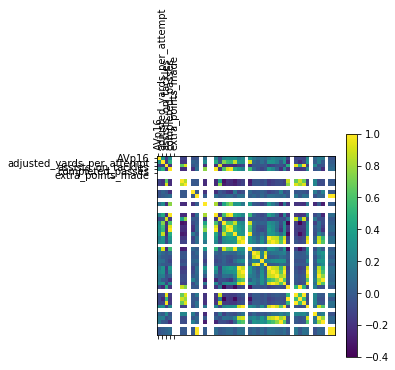

In [11]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

#from IPython.display import Image
#img=plt.to_image(format="png")
#Image(img)

In [12]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.6170205047073607
Weights:  [ 1.22690835e+00 -9.76343518e-02 -1.69447696e-02  5.21999111e-13
  8.97990016e-13  3.24057872e+00 -2.19577646e+00  1.40787382e-12
  1.02745590e-12  4.57689442e-12 -5.52830122e-02 -1.85865212e-12
 -3.20188320e-13  9.63240756e-04 -2.44180879e-02  1.94898278e-01
  1.14134176e-01  6.00670175e-04  3.11390103e-01 -4.01614950e-01
  4.47394911e-02  8.88178420e-16 -1.57140321e-01  2.37381073e-02
  5.91572078e-02 -4.99613472e-02 -7.99516899e-01  3.97901949e-01
 -1.62815254e-02 -3.08233905e-02  1.09501940e+00  7.45658185e-03
 -8.50581301e+00  0.00000000e+00 -1.39446946e-02  7.37365549e+00
 -1.11579046e-01  7.45658185e-03  0.00000000e+00  2.83338173e-02
 -6.41845647e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]


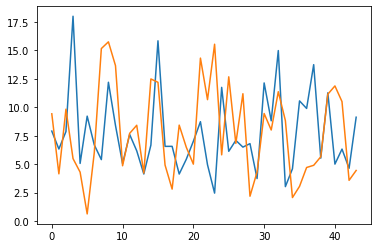

In [13]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['completed_passes', 'other_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'plays_from_scrimmage']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.15614662420054648
Weights:  [ 5.44739545e-03 -5.74193471e-16  1.68042536e-03  1.62822611e-01
 -1.03871698e-02]


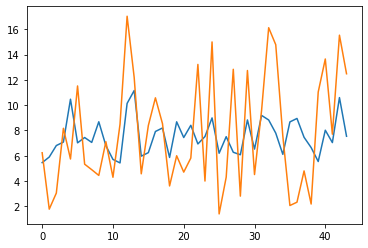

In [16]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.1561224770909858
Weights:  [ 0.00544692  0.          0.00168181  0.16237263 -0.01039015]


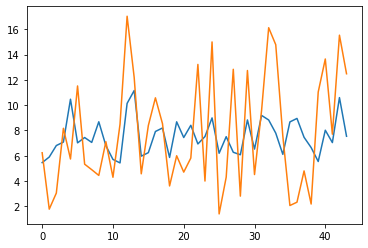

In [17]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [18]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.005531602848760908
[ 5.69916635e-03  3.29292258e-17  1.53826695e-03  2.56313294e-01
 -9.38512610e-03]

Ridge Regression
0.008861860254844997
[ 0.00566992  0.          0.00144467  0.26520218 -0.0090346 ]
